In [ ]:
# NOTE THAT, there is no attendence data in new dataset, cuase it is strings

Original shape: (1140, 40)

Class distribution before SMOTE:
 outcome
 1    492
-1    391
 0    257
Name: count, dtype: int64

Class distribution after SMOTE:
 outcome
 1    492
 0    492
-1    492
Name: count, dtype: int64

Reduced shape after PCA: (1476, 24)
Explained variance ratio per component: [0.2337271  0.07279936 0.05867868 0.05135987 0.05001136 0.04231839
 0.03565693 0.03468926 0.03201894 0.03128172 0.02999329 0.02958547
 0.02900581 0.0284407  0.02659652 0.02490528 0.02430109 0.02149629
 0.02000398 0.01726147 0.01702088 0.01625322 0.01595203 0.01492184]
Total variance explained: 0.9582795061928115


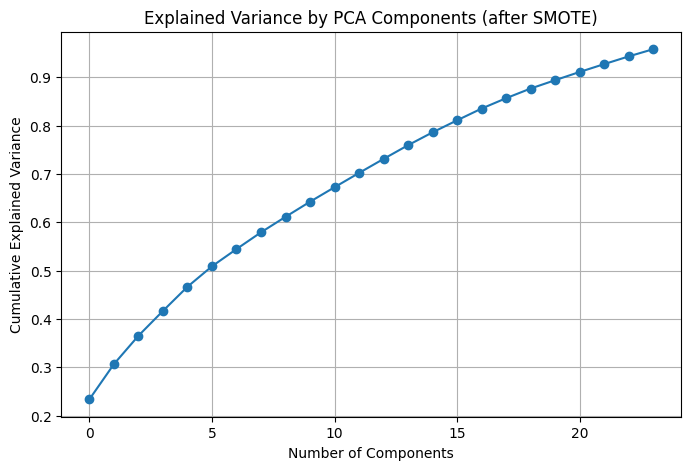


Final dataset shape: (1476, 25)
Saved as mydata_balanced_pca.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("mydata.csv")
print("Original shape:", df.shape)

# 2. Define a target variable for balancing
#    Outcome = 1 (home win), 0 (draw), -1 (away win)
if "Goals Home" in df.columns and "Away Goals" in df.columns:
    df["outcome"] = np.where(df["Goals Home"] > df["Away Goals"], 1,
                      np.where(df["Goals Home"] < df["Away Goals"], -1, 0))

# 3. Balance dataset using SMOTE
# Select numeric features (exclude outcome)
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("outcome")

X = df[num_cols]
y = df["outcome"]

print("\nClass distribution before SMOTE:\n", y.value_counts())

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:\n", pd.Series(y_res).value_counts())

# 4. Apply PCA on the resampled dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# keep enough components to explain ~95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("\nReduced shape after PCA:", X_pca.shape)
print("Explained variance ratio per component:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

# Optional: Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components (after SMOTE)")
plt.grid(True)
plt.show()

# 5. Create final balanced + PCA-transformed dataset
df_final = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_final["outcome"] = y_res

print("\nFinal dataset shape:", df_final.shape)
df_final.to_csv("mydata_balanced_pca.csv", index=False)
print("Saved as mydata_balanced_pca.csv")


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your balanced + PCA-transformed dataset
df_final = pd.read_csv("mydata_balanced_pca.csv")

# Separate features (X) and target (y)
X = df_final.drop(columns=["outcome"])
y = df_final["outcome"]

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Save for future use
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
print("Saved train/test splits as CSV files.")


Training set shape: (1180, 24) (1180,)
Testing set shape: (296, 24) (296,)
Saved train/test splits as CSV files.
